# Tristan Josh D. Yangco

Crop Recommendation Dataset

Maximize agricultural yield by recommending appropriate crops

All factors in the dataset are candidates for determining sustainable crops. However, a strategy is needed to recommend farmers which crops are suitable to grow in a particular farm. In order to perform precision agriculture, we must carefully select which factors have the right number of measurements for a crop to become more sustainable.

Source: https://www.kaggle.com/atharvaingle/crop-recommendation-dataset

Note: N = amount of nitrogen, P = amount of Phosphorus, and K = amount of Potassium.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
crop = pd.read_csv(r'Crop_recommendation.csv')
crop.index = crop['label']
crop = crop.drop('label', axis = 1)
crop = crop.astype(float)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
rice,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
rice,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
rice,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
rice,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
rice,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340


In [5]:
corr = crop.corr()
display(corr)

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

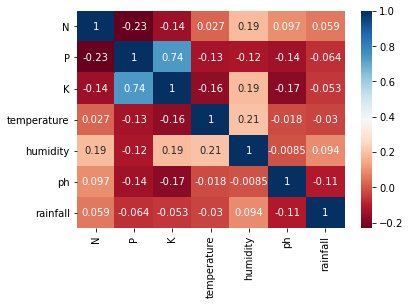

In [6]:
sns.heatmap(crop.corr(), annot=True, cmap="RdBu")
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [271]:
crop_before = crop
crop_after = crop.drop(['P', 'temperature'], axis=1)

x1 = sm.tools.add_constant(crop_before)
x2 = sm.tools.add_constant(crop_after)

series_before = pd.Series([variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])], index=x1.columns)
series_after = pd.Series([variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])], index=x2.columns)

print('Data before')
display(series_before)

print('Data after')
display(series_after)

Data before


const          127.038641
N                1.097026
P                2.630465
K                2.797118
temperature      1.111104
humidity         1.368986
ph               1.055803
rainfall         1.037426
dtype: float64

Data after


const       92.225006
N            1.080950
K            1.109015
humidity     1.103519
ph           1.052088
rainfall     1.031623
dtype: float64

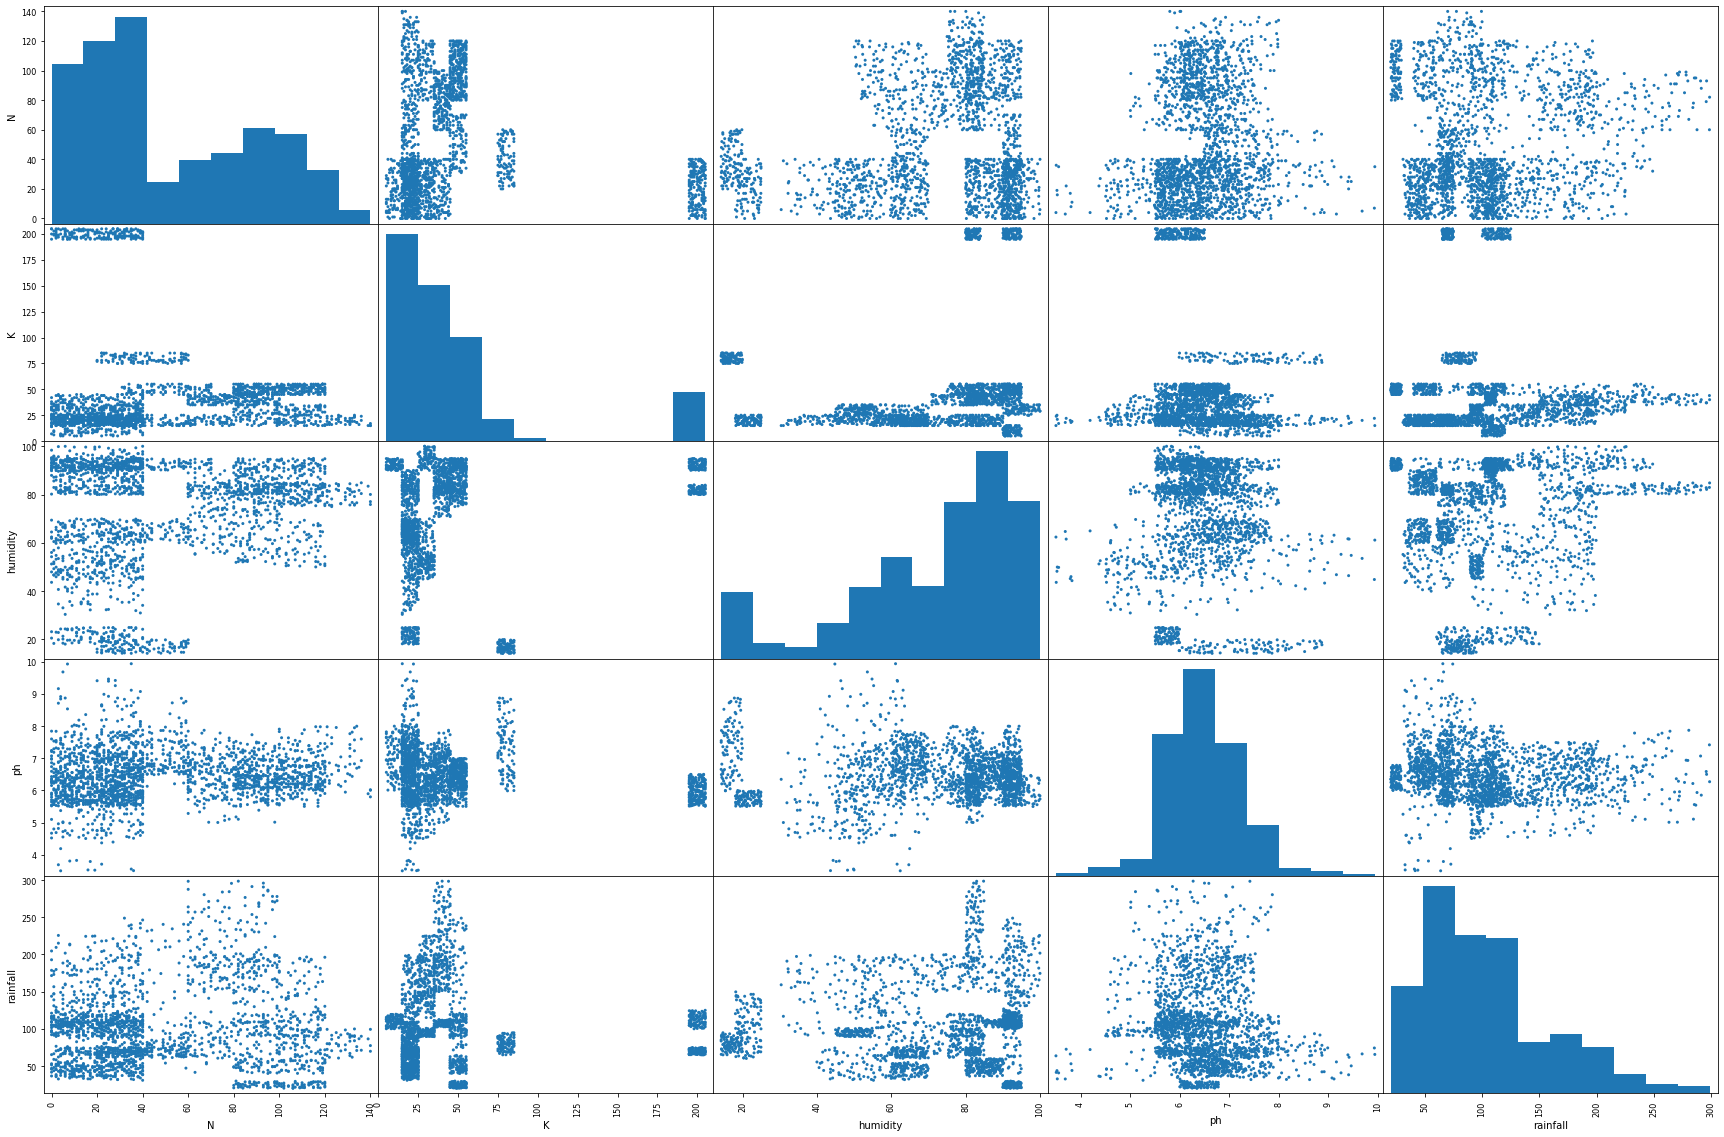

In [272]:
pd.plotting.scatter_matrix(crop_after, alpha=1,figsize= (30,20))
plt.show()

In [273]:
desc_crop = crop.describe()

desc_crop.loc['+3_std'] = desc_crop.loc['mean'] + (desc_crop.loc['std']*3)
desc_crop.loc['-3_std'] = desc_crop.loc['mean'] - (desc_crop.loc['std']*3)

desc_crop

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117
+3_std,161.303820,152.320375,200.092883,40.807490,138.273214,8.791293,268.338821
-3_std,-60.200183,-45.594921,-103.794701,10.424998,4.690344,4.147667,-61.411510


In [274]:
crop_remove = crop[(np.abs(stats.zscore(crop)) < 3).all(axis=1)]
crop.index.difference(crop_remove.index)

Index([], dtype='object', name='label')

In [275]:
crop_after = crop.drop(['temperature'], axis=1)
x = crop_after.drop('P', axis = 1)
y = crop_after[['P']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.50, random_state = 1)

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [276]:
intercept = model.intercept_
print("Intercept: ",intercept)
coefficient = model.coef_[0][0]

for coef in zip(x.columns, model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

Intercept:  [59.2862448]
The Coefficient for N is -0.08
The Coefficient for K is 0.51
The Coefficient for humidity is -0.39
The Coefficient for ph is 0.11
The Coefficient for rainfall is 0.0042


In [277]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[125.71929764],
       [ 42.07447235],
       [ 60.58930951],
       [ 41.55202985],
       [ 42.38654142]])

In [278]:
x2 = sm.add_constant(x)
model = sm.OLS(y,x2)
est = model.fit()

In [279]:
model_r2 = r2_score(y_test, y_pred)
print("R2: ",model_r2)

R2:  0.6427633868920484


In [280]:
est.conf_int()

,0,1
const,50.979010,67.390454
N,-0.090830,-0.042692
K,0.486381,0.521922
humidity,-0.414838,-0.334187
ph,-1.179810,1.085570
rainfall,-0.012372,0.019218


In [281]:
est.pvalues

const       1.561237e-43
N           5.942319e-08
K           0.000000e+00
humidity    3.932298e-69
ph          9.349884e-01
rainfall    6.709248e-01
dtype: float64

In [282]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     706.9
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        03:17:19   Log-Likelihood:                -9756.8
No. Observations:                2200   AIC:                         1.953e+04
Df Residuals:                    2194   BIC:                         1.956e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.1847      4.184     14.144      0.0

In [283]:
crop_after = crop.drop(['temperature', 'ph', 'rainfall'], axis=1)

x = crop_after.drop('P', axis=1)
y = crop_after[['P']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.50, random_state = 1)

regr_model = LinearRegression()

regr_model.fit(x_train, y_train)

LinearRegression()

In [284]:
x2 = sm.add_constant(x)
model = sm.OLS(y,x2)
est = model.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1179.
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        03:17:38   Log-Likelihood:                -9756.9
No. Observations:                2200   AIC:                         1.952e+04
Df Residuals:                    2196   BIC:                         1.954e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.1761      1.518     38.975      0.0